<a href="https://colab.research.google.com/github/BasselHarby/WPC-Evolutionary-Optimization/blob/main/Figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

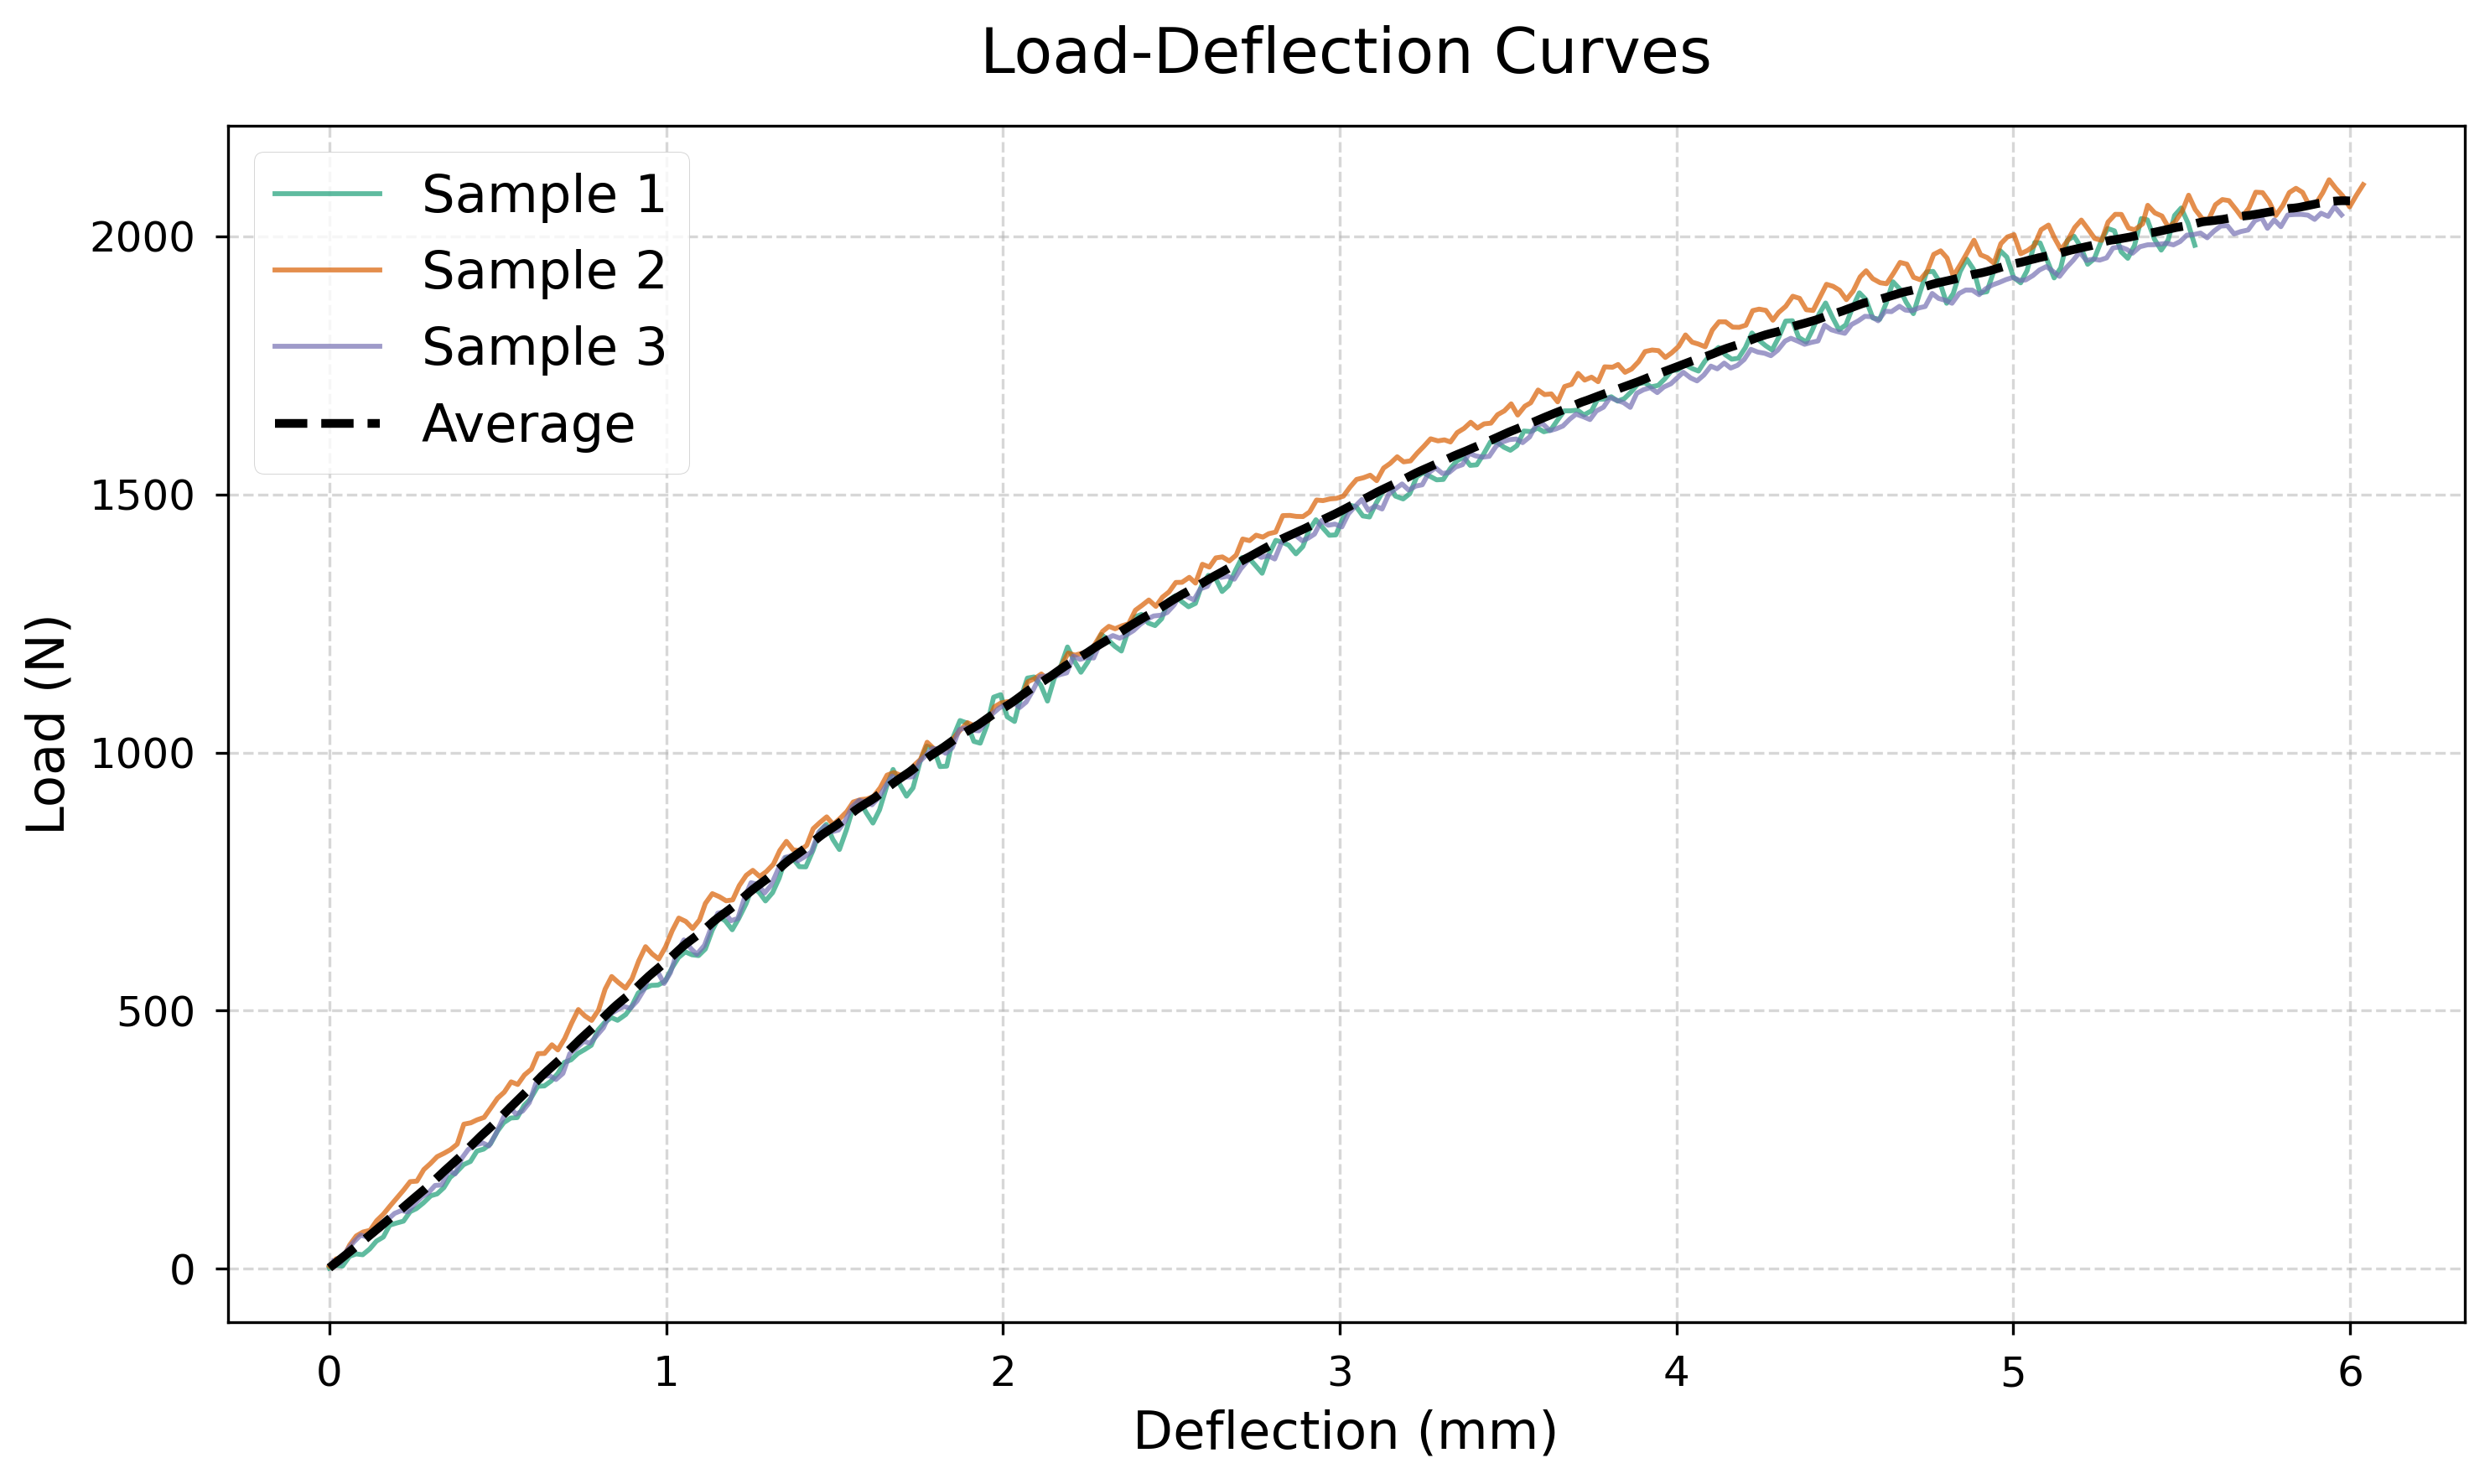

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.signal import savgol_filter
import seaborn as sns

# Read the CSV data
data = pd.read_csv('/content/Bending Combined.csv')

plt.figure(figsize=(10, 6), dpi=300)

plt.style.use('seaborn-v0_8-paper')

colors = ['#1b9e77', '#d95f02', '#7570b3', '#000000']

# Plot individual curves
plt.plot(data['Deflection1'], data['Load1'], '-', color=colors[0], alpha=0.7, label='Sample 1')
plt.plot(data['Deflection2'], data['Load2'], '-', color=colors[1], alpha=0.7, label='Sample 2')
plt.plot(data['Deflection3'], data['Load3'], '-', color=colors[2], alpha=0.7, label='Sample 3')

# Calculate average curve
# First, create a common x-axis (deflection) range
deflection_range = np.linspace(0, 6, 1000)

# Interpolate each curve to the common x-axis
from scipy.interpolate import interp1d

f1 = interp1d(data['Deflection1'].dropna(), data['Load1'].dropna(), bounds_error=False)
f2 = interp1d(data['Deflection2'].dropna(), data['Load2'].dropna(), bounds_error=False)
f3 = interp1d(data['Deflection3'].dropna(), data['Load3'].dropna(), bounds_error=False)

# Get interpolated y-values
y1 = f1(deflection_range)
y2 = f2(deflection_range)
y3 = f3(deflection_range)

# Stack interpolated values and calculate average
y_stack = np.vstack([y1, y2, y3])
y_mean = np.nanmean(y_stack, axis=0)

# Apply Savitzky-Golay filter for smoothing
y_mean_smooth = savgol_filter(y_mean, window_length=51, polyorder=3)

# Plot smoothed average
plt.plot(deflection_range, y_mean_smooth, '--', color=colors[3], linewidth=2.5, label='Average')

# Lables and Plot titles, and plot style
plt.xlabel('Deflection (mm)', fontsize=15)
plt.ylabel('Load (N)', fontsize=15)
plt.title('Load-Deflection Curves', fontsize=18, pad=15)

plt.grid(True, linestyle='--', alpha=0.5)

plt.legend(frameon=True, fontsize=15, loc='upper left')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()

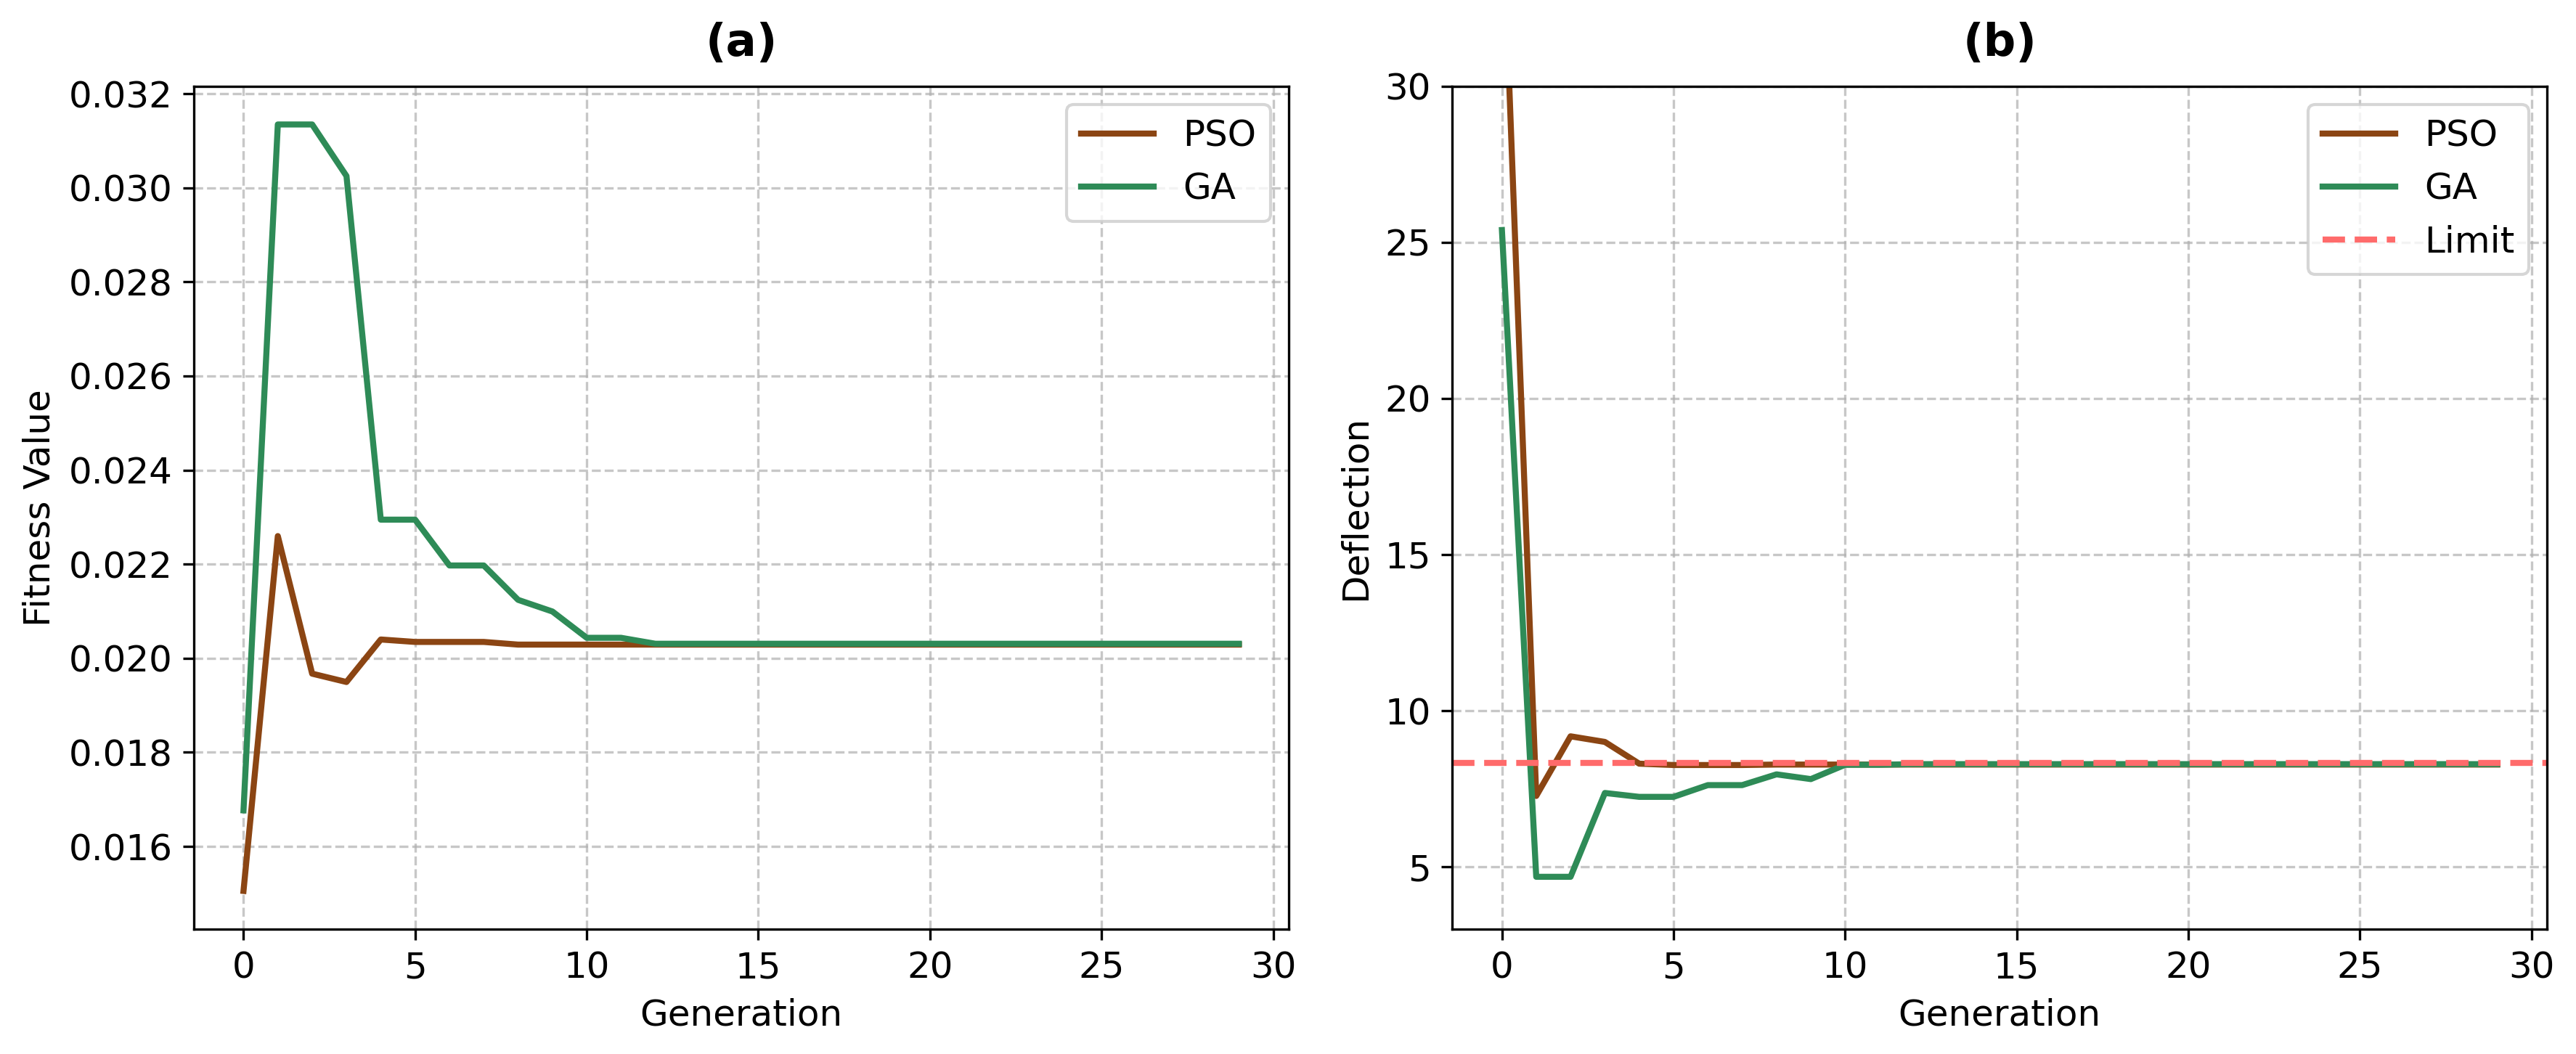

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

GA_history = pd.read_csv('/content/SinePanelHistory_GA.csv')
PSO_history = pd.read_csv('/content/SinePanelHistory_PSO.csv')

fitness_PSO = PSO_history['F']
fitness_GA = GA_history['F']
deflection_PSO = PSO_history['G'] + 8.33
deflection_GA = GA_history['G'] + 8.33

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot (a) - Fitness Comparison
ax1.plot(fitness_PSO, label='PSO', color='#8B4513', linewidth=2)
ax1.plot(fitness_GA, label='GA', color='#2E8B57', linewidth=2)
ax1.set_xlabel('Generation')
ax1.set_ylabel('Fitness Value')
ax1.set_title('(a)',fontsize=15, pad=10, weight='bold')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# Plot (b) - Deflection Comparison

ax2.plot(deflection_PSO, label='PSO', color='#8B4513', linewidth=2)
ax2.plot(deflection_GA, label='GA', color='#2E8B57', linewidth=2)
ax2.axhline(y=8.33, linestyle='--', color='#FF6B6B', linewidth=2, label='Limit')
ax2.set_xlabel('Generation')
ax2.set_ylabel('Deflection')
ax2.set_title('(b)',fontsize=15, pad=10, weight='bold')
ax2.set_ylim([3, 30])
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()

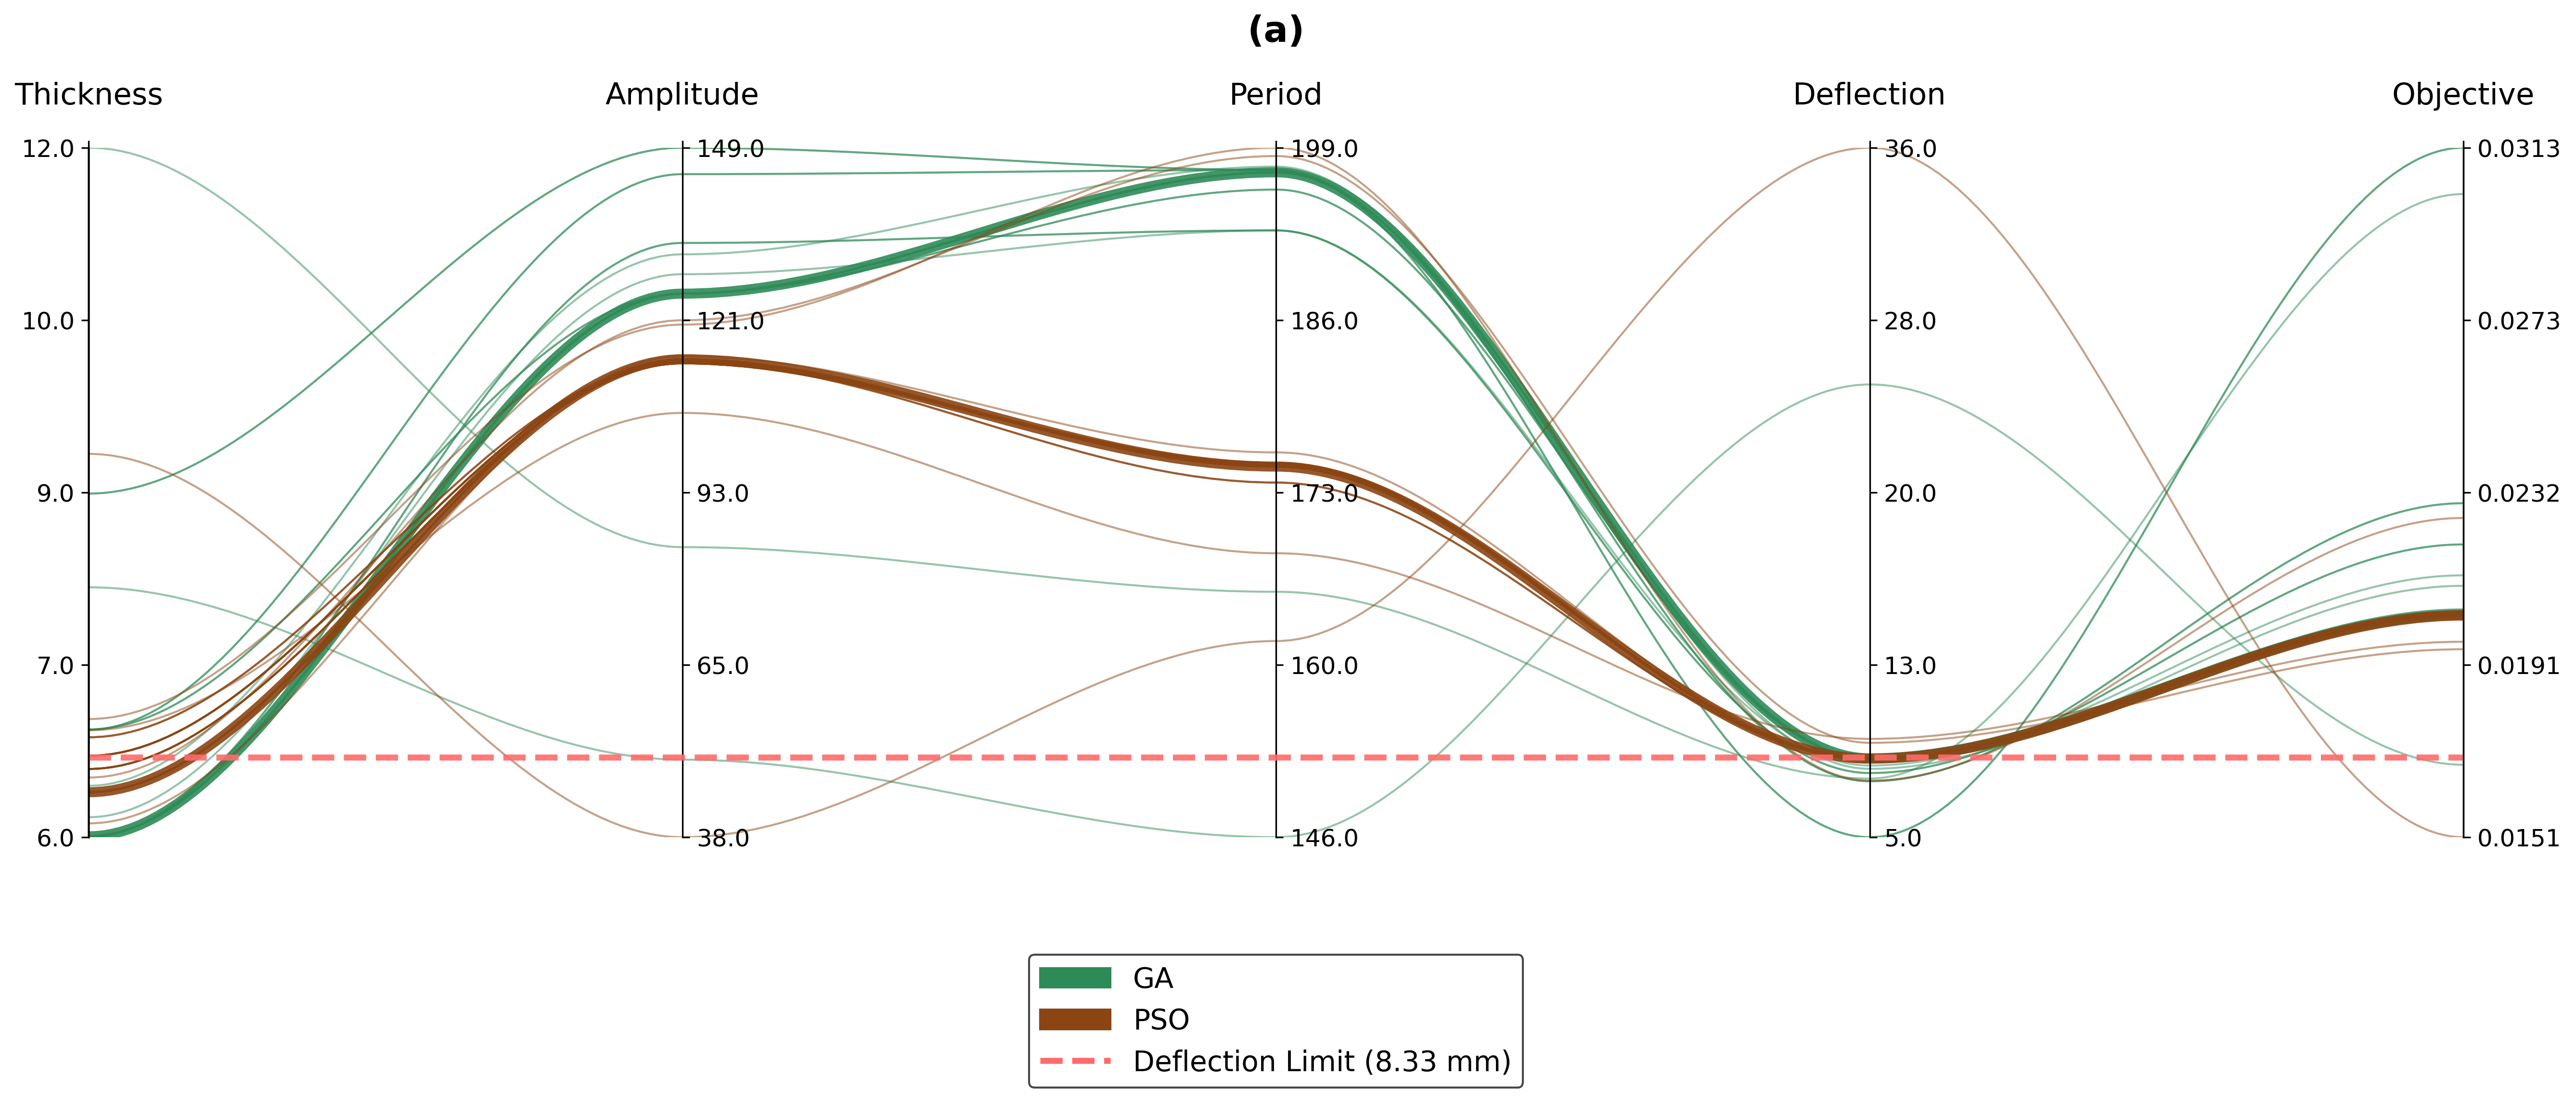

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
# Load data
ga = pd.read_csv('SinePanelHistory_GA.csv')
pso = pd.read_csv('SinePanelHistory_PSO.csv')

# Add Deflection column and identify optimals
for df, alg in zip([ga, pso], ['GA', 'PSO']):
    df['Deflection'] = df['G'] + 8.33
    df['Algorithm'] = alg
    df['Is_Optimal'] = False

    # Mark last valid solution (G < 0)
    valid = df[df['G'] < 0]
    if not valid.empty:
        df.loc[valid.index[-1], 'Is_Optimal'] = True

combined = pd.concat([ga, pso], ignore_index=True)

# Select and order variables
variables = ['T', 'Amp', 'P', 'Deflection', 'F']
labels = ['Thickness', 'Amplitude', 'Period', 'Deflection', 'Objective']

# Get actual value ranges
ymins = combined[variables].min()
ymaxs = combined[variables].max()
ranges = ymaxs - ymins

# Normalize data for plotting
zs = (combined[variables] - ymins) / ranges

# Create figure with larger font sizes
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'figure.dpi': 300})
fig, host = plt.subplots(figsize=(18, 8))

# Configure axes
axes = [host] + [host.twinx() for _ in range(len(variables)-1)]

for i, (ax, var) in enumerate(zip(axes, variables)):
    ax.set_ylim(0, 1)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # Set custom ticks with actual values
    if var == 'F':
      tick_positions = np.linspace(0, 1, 5)
      tick_labels = np.round(ymins[var] + tick_positions * ranges[var], 4)
    else:
      tick_positions = np.linspace(0, 1, 5)
      tick_labels = np.round(ymins[var] + tick_positions * ranges[var], 0)
    ax.set_yticks(tick_positions)
    ax.set_yticklabels(tick_labels, fontsize=12)

    # Add deflection constraint
    if var == 'Deflection':
        constraint_pos = (8.33 - ymins[var]) / ranges[var]
        ax.axhline(constraint_pos, color='#FF6B6B', linestyle='--', lw=3, alpha=0.9)

    # Axis styling
    if ax == host:
        ax.spines['left'].set_visible(True)
        ax.yaxis.set_label_position('left')
        ax.yaxis.tick_left()
    else:
        ax.spines['right'].set_visible(True)
        ax.spines["right"].set_position(("axes", i/(len(variables)-1)))

# Plot data
for idx, row in combined.iterrows():
    line_color = '#2E8B57' if row['Algorithm'] == 'GA' else '#8B4513'
    lw = 5 if row['Is_Optimal'] else 1
    alpha = 0.9 if row['Is_Optimal'] else 0.5

    verts = list(zip(np.linspace(0, 4, len(variables)*3-2),
                     np.repeat(zs.loc[idx].values, 3)[1:-1]))
    path = Path(verts, [Path.MOVETO] + [Path.CURVE4]*(len(verts)-1))
    patch = patches.PathPatch(path, facecolor='none', lw=lw, alpha=alpha, edgecolor=line_color)
    host.add_patch(patch)

# Configure labels and ticks
host.set_xlim(0, len(variables)-1)
host.set_xticks(range(len(variables)))
host.set_xticklabels(labels, fontsize=15)
host.tick_params(axis='x', which='major', pad=15)
host.xaxis.tick_top()

# Create enhanced legend
legend_elements = [
    patches.Patch(color='#2E8B57', label='GA'),
    patches.Patch(color='#8B4513', label='PSO'),
    Line2D([], [], linestyle='--', color='#FF6B6B', linewidth=3, label='Deflection Limit (8.33 mm)')
]

legend = host.legend(handles=legend_elements, loc='upper center',
                    bbox_to_anchor=(0.5, -0.15),
                    fontsize=14, handlelength=2.5,
                    framealpha=0.9, edgecolor='#333333')

# Add title with padding
host.set_title('(a)',
              fontsize=18, pad=20, weight='bold')

plt.tight_layout()
plt.show()

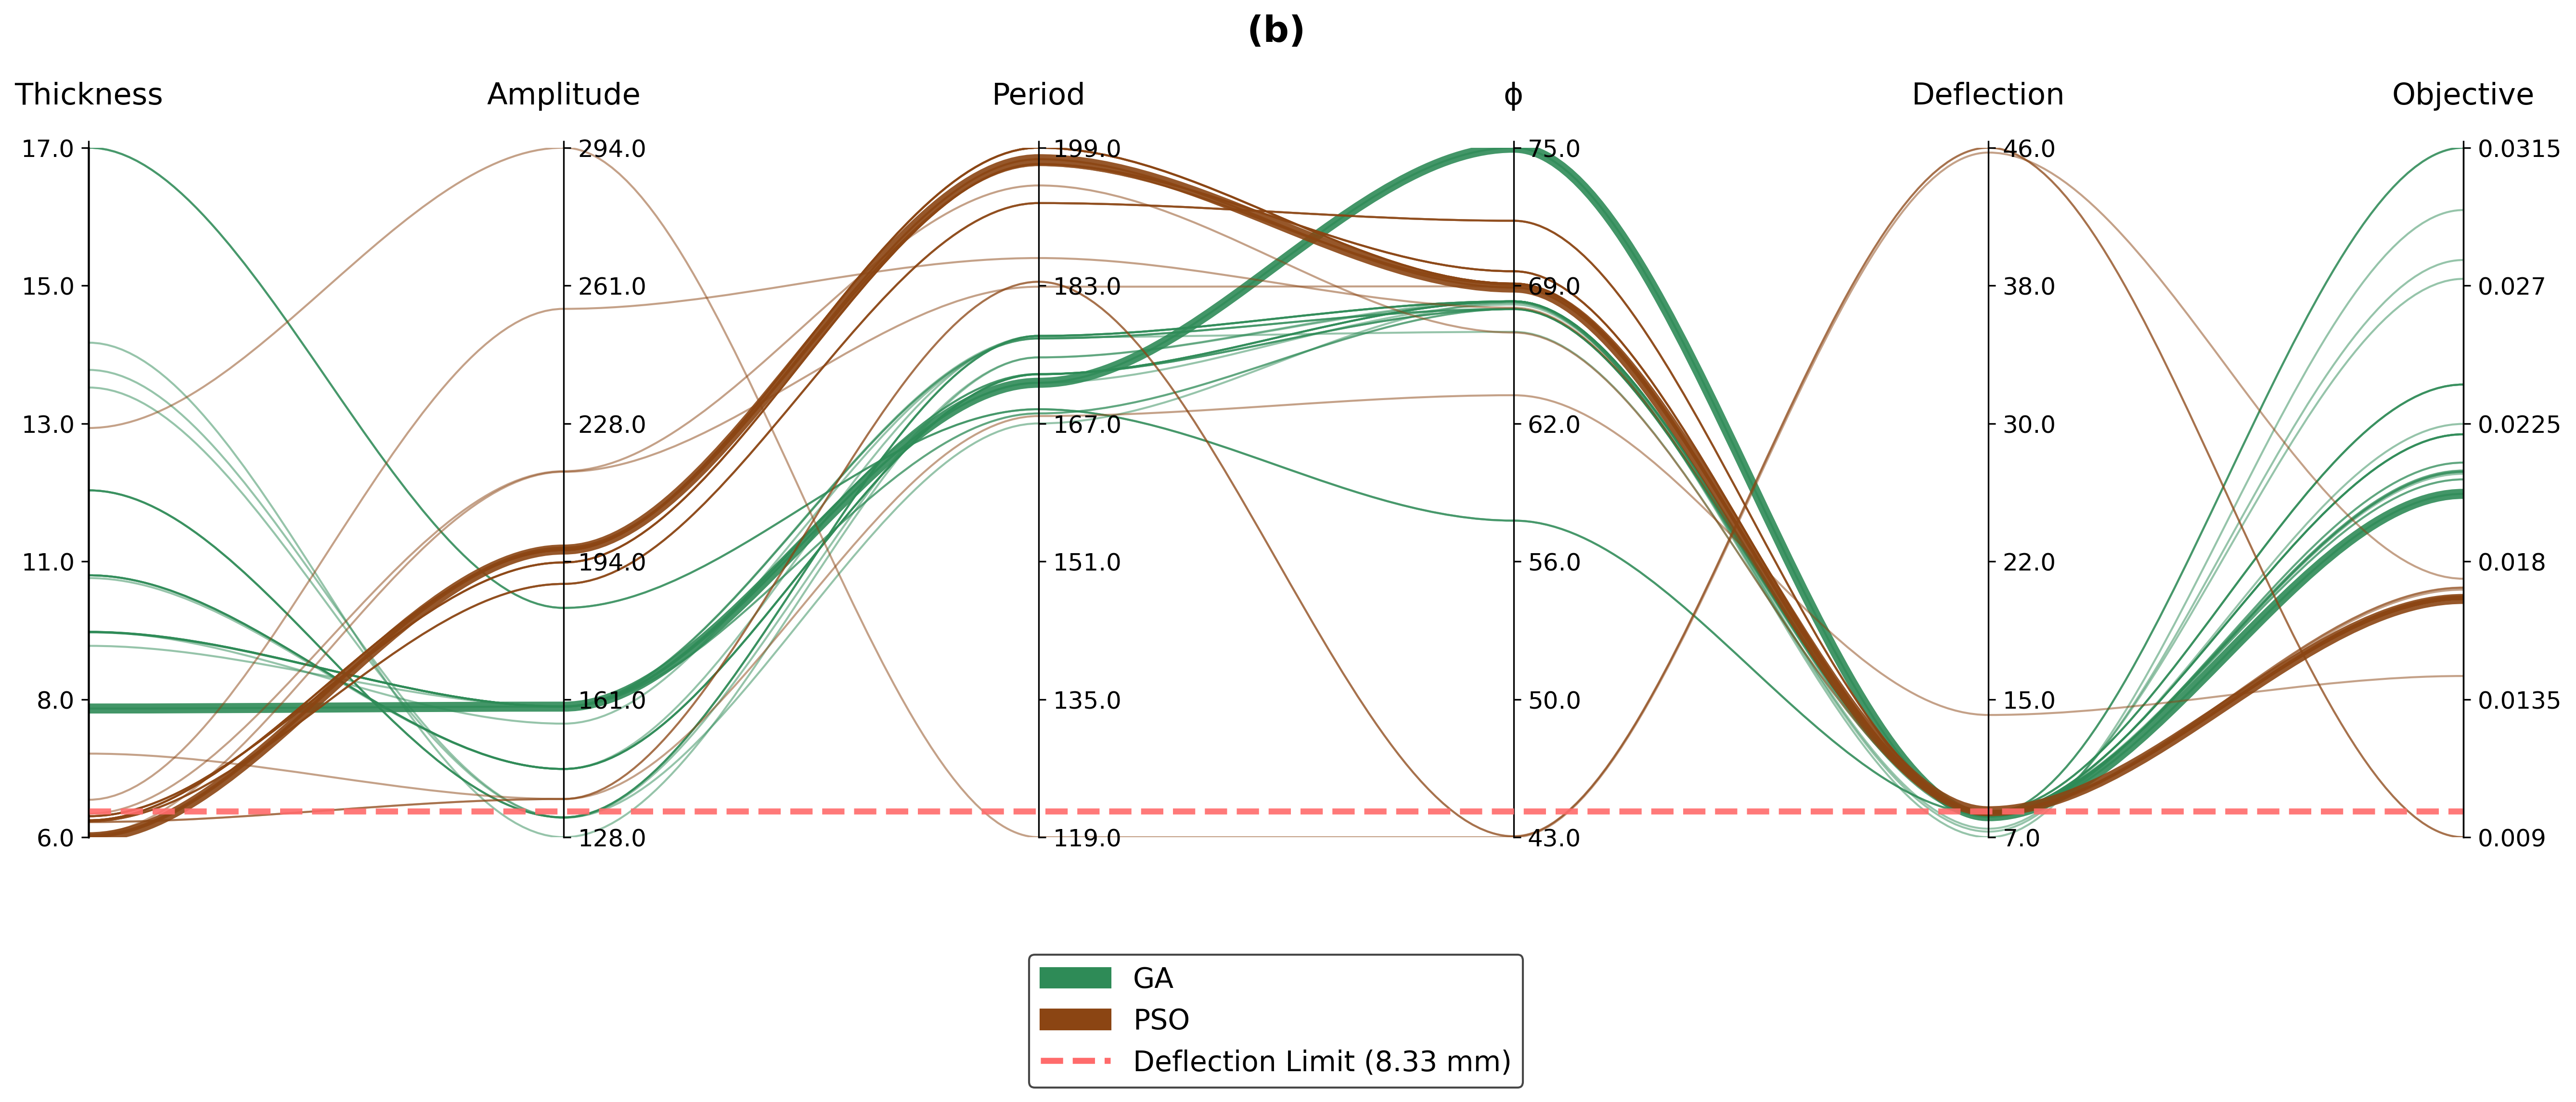

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import pandas as pd
import numpy as np
from matplotlib.lines import Line2D
# Load data
ga = pd.read_csv('/content/TrPanelHistory_GA.csv')
pso = pd.read_csv('/content/TrPanelHistory_PSO.csv')

# Add Deflection column and identify optimals
for df, alg in zip([ga, pso], ['GA', 'PSO']):
    df['Deflection'] = df['G'] + 8.33
    df['Algorithm'] = alg
    df['Is_Optimal'] = False

    # Mark last valid solution (G < 0)
    valid = df[df['G'] < 0]
    if not valid.empty:
        df.loc[valid.index[-1], 'Is_Optimal'] = True

combined = pd.concat([ga, pso], ignore_index=True)

# Select and order variables
variables = ['T', 'Amp', 'P', 'Phi', 'Deflection', 'F']
labels = ['Thickness', 'Amplitude', 'Period', 'ϕ', 'Deflection', 'Objective']

# Get actual value ranges
ymins = combined[variables].min()
ymaxs = combined[variables].max()
ranges = ymaxs - ymins

# Normalize data for plotting
zs = (combined[variables] - ymins) / ranges

# Create figure with larger font sizes
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'figure.dpi': 300})
fig, host = plt.subplots(figsize=(18, 8))

# Configure axes
axes = [host] + [host.twinx() for _ in range(len(variables)-1)]

for i, (ax, var) in enumerate(zip(axes, variables)):
    ax.set_ylim(0, 1)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # Set custom ticks with actual values
    if var == 'F':
      tick_positions = np.linspace(0, 1, 6)
      tick_labels = np.round(ymins[var] + tick_positions * ranges[var], 4)
    else:
      tick_positions = np.linspace(0, 1, 6)
      tick_labels = np.round(ymins[var] + tick_positions * ranges[var], 0)
    ax.set_yticks(tick_positions)
    ax.set_yticklabels(tick_labels, fontsize=12)

    # Add deflection constraint
    if var == 'Deflection':
        constraint_pos = (8.33 - ymins[var]) / ranges[var]
        ax.axhline(constraint_pos, color='#FF6B6B', linestyle='--', lw=3, alpha=0.9)

    # Axis styling
    if ax == host:
        ax.spines['left'].set_visible(True)
        ax.yaxis.set_label_position('left')
        ax.yaxis.tick_left()
    else:
        ax.spines['right'].set_visible(True)
        ax.spines["right"].set_position(("axes", i/(len(variables)-1)))

# Plot data
for idx, row in combined.iterrows():
    line_color = '#2E8B57' if row['Algorithm'] == 'GA' else '#8B4513'
    lw = 5 if row['Is_Optimal'] else 1
    alpha = 0.9 if row['Is_Optimal'] else 0.5

    verts = list(zip(np.linspace(0, 5, len(variables)*3-2),
                     np.repeat(zs.loc[idx].values, 3)[1:-1]))
    path = Path(verts, [Path.MOVETO] + [Path.CURVE4]*(len(verts)-1))
    patch = patches.PathPatch(path, facecolor='none', lw=lw, alpha=alpha, edgecolor=line_color)
    host.add_patch(patch)

# Configure labels and ticks
host.set_xlim(0, len(variables)-1)
host.set_xticks(range(len(variables)))
host.set_xticklabels(labels, fontsize=15)
host.tick_params(axis='x', which='major', pad=15)
host.xaxis.tick_top()

# Create enhanced legend
legend_elements = [
    patches.Patch(color='#2E8B57', label='GA'),
    patches.Patch(color='#8B4513', label='PSO'),
    Line2D([], [], linestyle='--', color='#FF6B6B', linewidth=3, label='Deflection Limit (8.33 mm)')
]

legend = host.legend(handles=legend_elements, loc='upper center',
                    bbox_to_anchor=(0.5, -0.15),
                    fontsize=14, handlelength=2.5,
                    framealpha=0.9, edgecolor='#333333')

# Add title with padding
host.set_title('(b)',
              fontsize=18, pad=20, weight='bold')

plt.tight_layout()
plt.show()